In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [ ]:
N=10
P=10

for x in range(P):
  vector = np.random.randint(size=N, low=0, high=2)
  print(vector)

[0 0 1 0 0 0 1 1 0 1]
[1 1 0 0 1 0 0 0 0 0]
[0 0 1 0 0 1 1 1 1 0]
[1 1 0 0 0 0 1 1 1 1]
[0 0 0 0 0 1 0 1 0 1]
[0 1 0 0 0 0 0 1 1 1]
[0 0 0 1 1 1 0 1 1 1]
[1 1 1 1 1 1 1 1 0 0]
[0 0 0 1 0 0 0 1 0 1]
[1 0 0 1 0 1 1 0 0 1]


# QUESTION 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Question 4.a

# Solved in Mathematica:

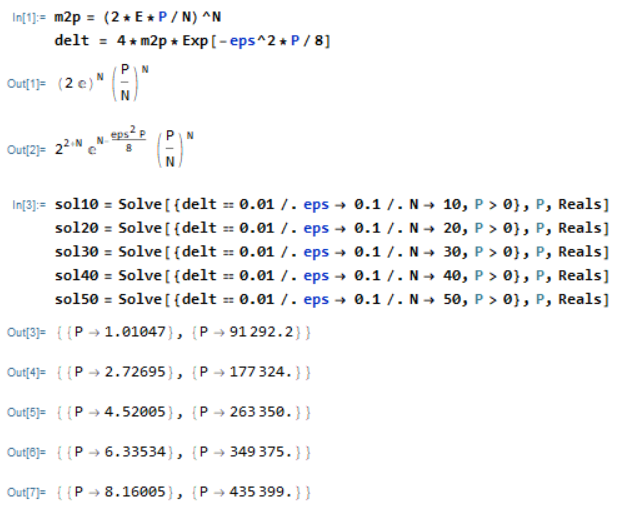

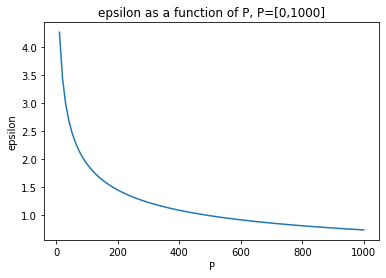

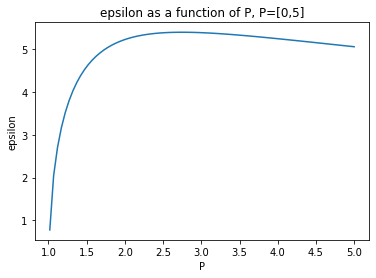

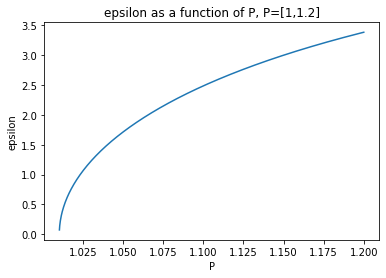

In [ ]:
## Epsilon over specific ranges

# plotting epsilon over large range of P

N = 10
P = np.linspace(0.01,1000,100)

m2p = (2*math.e*P/N)**N
eps = np.sqrt(-(8/P)*(np.log(0.01)-np.log(4*m2p)))

plt.plot(P,eps)
plt.xlabel('P')
plt.ylabel('epsilon')
plt.title('epsilon as a function of P, P=[0,1000]')
plt.show()

# plotting epsilon over small range of P

N = 10
P = np.linspace(0.01,5,100)

m2p = (2*math.e*P/N)**N
eps = np.sqrt(-(8/P)*(np.log(0.01)-np.log(4*m2p)))

plt.plot(P,eps)
plt.xlabel('P')
plt.ylabel('epsilon')
plt.title('epsilon as a function of P, P=[0,5]')
plt.show()

# plotting epsilon for detailed P-range, at starting-point

N = 10
P = np.linspace(1,1.2,1000)

m2p = (2*math.e*P/N)**N
eps = np.sqrt(-(8/P)*(np.log(0.01)-np.log(4*m2p)))

plt.plot(P,eps)
plt.xlabel('P')
plt.ylabel('epsilon')
plt.title('epsilon as a function of P, P=[1,1.2]')
plt.show()

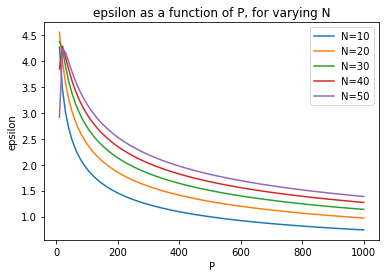

In [ ]:
## Epsilon for varying N

# plotting epsilon over large range of P

N = [10,20,30,40,50]
for N in N:
  P = np.linspace(0.01,1000,100)

  m2p = (2*math.e*P/N)**N
  eps = np.sqrt(-(8/P)*(np.log(0.01)-np.log(4*m2p)))

  plt.plot(P,eps,label='N={}'.format(N))
  plt.xlabel('P')
  plt.ylabel('epsilon')
  plt.title('epsilon as a function of P, for varying N')
  plt.legend()
plt.show()

# Question 4.b

In [ ]:
# make teacher weights with set random seed
N = 10
np.random.seed(5)
w_teacher = np.random.randn(1,N).T

In [ ]:
# initialize input matrix, and output labels according to teacher weights

P = 10
input = np.random.randint(0,2,size=(P,N))
input[np.where(input==0)]=-1

teacher_labels = np.sign(np.dot(input,w_teacher))

print(input)
print('')
print(w_teacher)
print('')
print(teacher_labels)

[[-1  1  1  1  1 -1 -1 -1  1 -1]
 [-1  1  1 -1  1  1 -1  1 -1  1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1  1]
 [ 1  1  1 -1 -1 -1  1  1  1 -1]
 [ 1  1  1 -1 -1  1 -1 -1  1  1]
 [ 1 -1  1  1  1  1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1  1 -1  1  1 -1  1 -1  1]
 [-1  1 -1 -1 -1  1 -1  1 -1 -1]
 [-1  1  1 -1  1 -1 -1 -1 -1 -1]]

[[ 0.44122749]
 [-0.33087015]
 [ 2.43077119]
 [-0.25209213]
 [ 0.10960984]
 [ 1.58248112]
 [-0.9092324 ]
 [-0.59163666]
 [ 0.18760323]
 [-0.32986996]]

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]]


In [ ]:
# make a test set input matrix 

N_test = 10
P_test = 10000
input_test = np.random.randint(0,2,size=(P_test,N_test))
input_test[np.where(input_test==0)]=-1

teacher_labels_test = np.sign(np.dot(input_test,w_teacher))
teacher_labels_test 

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [ 1.],
       [-1.],
       [-1.]])

In [ ]:
# initialize dimensions and learning rule
N = 10
n_patterns = [10,50,100,500,1000]
eta = 0.1


for P in n_patterns:

#create input for given dimensions
  input = np.random.randint(0,2,size=(P,N))
  input[np.where(input==0)]=-1

#calculate output labels from input and teacher weights
  teacher_labels = np.sign(np.dot(input,w_teacher))

# initialize random student weights vector
  w_student = np.random.randn(1,N).T
  x_in = input * teacher_labels 

# train random student weights vector with perceptron rule
# only weight columns which do not give x dot w > 0 are updated

  for i in range(20):
    not_converged = np.where(np.dot(x_in,w_student)<0)[0]
    if any(not_converged) == False:
      break
    
    else:

# all weight columns are updated simultaneously
      w_student = (w_student.T + eta*np.sum(x_in[not_converged,:],axis=0)).T

# check that all output labels correspond between student and teacher
  converged_bool = all(np.sign(np.dot(input,w_teacher)) == teacher_labels)
  print(' RUN WITH {} PATTERNS'.format(P))
  print('weights converged to correct outputs = {}'.format(converged_bool))
  print('converged after {} iterations'.format(i))

# now use the weights on the test set with P = 10.000; 
# calculate the generalization error of the weights on the test set
  student_labels_test = np.sign(np.dot(input_test,w_student))
  generalization_error = list((teacher_labels_test==student_labels_test)).count(True)/P_test
  print('generalization error on test set, ϵ: {:.5f}'.format(1-generalization_error))
  print('')

 RUN WITH 10 PATTERNS
weights converged to correct outputs = True
converged after 7 iterations
generalization error on test set, ϵ: 0.33870

 RUN WITH 50 PATTERNS
weights converged to correct outputs = True
converged after 4 iterations
generalization error on test set, ϵ: 0.12680

 RUN WITH 100 PATTERNS
weights converged to correct outputs = True
converged after 10 iterations
generalization error on test set, ϵ: 0.02340

 RUN WITH 500 PATTERNS
weights converged to correct outputs = True
converged after 8 iterations
generalization error on test set, ϵ: 0.01700

 RUN WITH 1000 PATTERNS
weights converged to correct outputs = True
converged after 16 iterations
generalization error on test set, ϵ: 0.00190



In [ ]:
# initialize dimensions and learning rule
N = 10
n_patterns = [10,50,100,500,1000]
eta = 0.1

# initialize # of runs and a matrix for the generalization errors
n_runs = 100
generalization_errors_mat = [[],[],[],[],[]]

for n_runs in range(n_runs):

  for P in n_patterns:

  #create input for given dimensions
    input = np.random.randint(0,2,size=(P,N))
    input[np.where(input==0)]=-1

  #calculate output labels from input and teacher weights
    teacher_labels = np.sign(np.dot(input,w_teacher))

  # initialize random student weights vector
    w_student = np.random.randn(1,N).T
    x_in = input * teacher_labels 

  # train random student weights vector with perceptron rule
  # only weight columns which do not give x dot w > 0 are updated

    for i in range(25): # while loop would fit better, but explodes for bad code
      not_converged = np.where(np.dot(x_in,w_student)<0)[0]
      if any(not_converged) == False:
        break
      
      else:

  # all weight columns are updated simultaneously
        w_student = (w_student.T + eta*np.sum(x_in[not_converged,:],axis=0)).T

  # now use the weights on the test set with P = 10.000; 
  # calculate the generalization error of the weights on the test set
    student_labels_test = np.sign(np.dot(input_test,w_student))
    generalization_error = list((teacher_labels_test==student_labels_test)).count(True)/P_test

# append generalization errors to matrix
    if P == n_patterns[0]:
      generalization_errors_mat[0].append(generalization_error)
    elif P == n_patterns[1]:
      generalization_errors_mat[1].append(generalization_error)
    elif P == n_patterns[2]:
      generalization_errors_mat[2].append(generalization_error)
    elif P == n_patterns[3]:
      generalization_errors_mat[3].append(generalization_error)
    elif P == n_patterns[4]:
      generalization_errors_mat[4].append(generalization_error)

# average over generalization errors for the different n_patterns
average_generalization_errors = np.mean(generalization_errors_mat,axis=1)

for i in range(len(n_patterns)):
  print('generalization error for 100 runs for {} patterns: {:.5f}  '.format(
      n_patterns[i],1-average_generalization_errors[i]))


generalization error for 100 runs for 10 patterns: 0.347  
generalization error for 100 runs for 50 patterns: 0.089  
generalization error for 100 runs for 100 patterns: 0.044  
generalization error for 100 runs for 500 patterns: 0.009  
generalization error for 100 runs for 1000 patterns: 0.003  


In [ ]:
N = 10
P = np.array([10,50,100,500,1000])
m2p = (2*math.e*P/N)**N
eps = np.sqrt(-(8/P)*(np.log(0.01)-np.log(4*m2p)))

In [ ]:
# !pip install tabulate
from tabulate import tabulate
data = np.array([P,eps,(1-average_generalization_errors)]).T
print(tabulate(data, 
               headers=['P','epsilon by bound','numerical epsilon']))

   P    epsilon by bound    numerical epsilon
----  ------------------  -------------------
  10            4.28233              0.347282
  50            2.49855              0.088953
 100            1.91726              0.044415
 500            0.996339             0.008829
1000            0.74283              0.002803
